# CA3
kaggle username: Anniken01


### Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats



### Reading data

In [23]:
train = pd.read_csv('/Users/73rabann/Desktop/DAT200/Assigments/Assignment3/CA3/train.csv')
test = pd.read_csv('/Users/73rabann/Desktop/DAT200/Assigments/Assignment3/CA3/test.csv')

### Data exploration and visualisation

In [24]:
train.head() # view first 5 lines 

,Unnamed: 0,Acoustic Firmness Index,Atmospheric Pressure at Harvest (Pa),Bitterness Scale,Circumference (mm),Color Intensity (a.u.),Find Distance from Main Vulcano (km),Length (mm),Luminescence Intensity (a.u.),Magnetic orientation (degree),Odor index (a.u.),Seed Count,Skin Thickness (mm),Soil pH where Grown,Sugar Content (mg),Weight (mg),pH,Edible
0,0,28.7,98741.0,0.0,222.897985,70.28,103.145212,35.481123,0.002636,61.877407,2.700236,71.355713,2.5,8.14,13792.0,87411.1826,5.090000,1.0
1,1,19.4,96077.0,0.0,205.832386,66.48,102.005624,32.609013,0.015950,297.191998,9.618586,46.291493,2.0,7.63,12985.0,72608.1826,4.990000,1.0
2,2,22.1,109154.0,2.0,234.406576,69.92,37.847317,37.926057,0.000279,61.103057,7.970050,54.442385,1.5,8.03,10008.0,109375.1826,5.219156,0.0
3,3,28.0,105277.0,5.0,214.999623,64.05,100.118399,34.610539,0.002323,58.677047,68.116450,106.401880,4.5,7.43,11303.0,84958.7826,3.228828,0.0
4,4,22.6,103898.0,2.0,180.542626,53.63,63.590438,28.948902,0.008611,317.261190,7.953544,48.057754,5.0,6.71,11475.0,49717.1826,4.800000,1.0


In [25]:
print(train.isna().sum()) # view missing data

Unnamed: 0                              0
Acoustic Firmness Index                 3
Atmospheric Pressure at Harvest (Pa)    0
Bitterness Scale                        4
Circumference (mm)                      2
Color Intensity (a.u.)                  0
Find Distance from Main Vulcano (km)    2
Length (mm)                             4
Luminescence Intensity (a.u.)           1
Magnetic orientation (degree)           3
Odor index (a.u.)                       2
Seed Count                              1
Skin Thickness (mm)                     1
Soil pH where Grown                     3
Sugar Content (mg)                      3
Weight (mg)                             4
pH                                      4
Edible                                  0
dtype: int64


In [26]:
train = train.drop(train.columns[0], axis=1) # remove first column, do not need two indexes
train = train.dropna() # remove NaN values 
train_target = train.iloc[:,-1] # separate target data from testing

train.shape


(1211, 17)

In [27]:
print(train.isna().sum()) # view if there is still missing data after removing NaN values

Acoustic Firmness Index                 0
Atmospheric Pressure at Harvest (Pa)    0
Bitterness Scale                        0
Circumference (mm)                      0
Color Intensity (a.u.)                  0
Find Distance from Main Vulcano (km)    0
Length (mm)                             0
Luminescence Intensity (a.u.)           0
Magnetic orientation (degree)           0
Odor index (a.u.)                       0
Seed Count                              0
Skin Thickness (mm)                     0
Soil pH where Grown                     0
Sugar Content (mg)                      0
Weight (mg)                             0
pH                                      0
Edible                                  0
dtype: int64


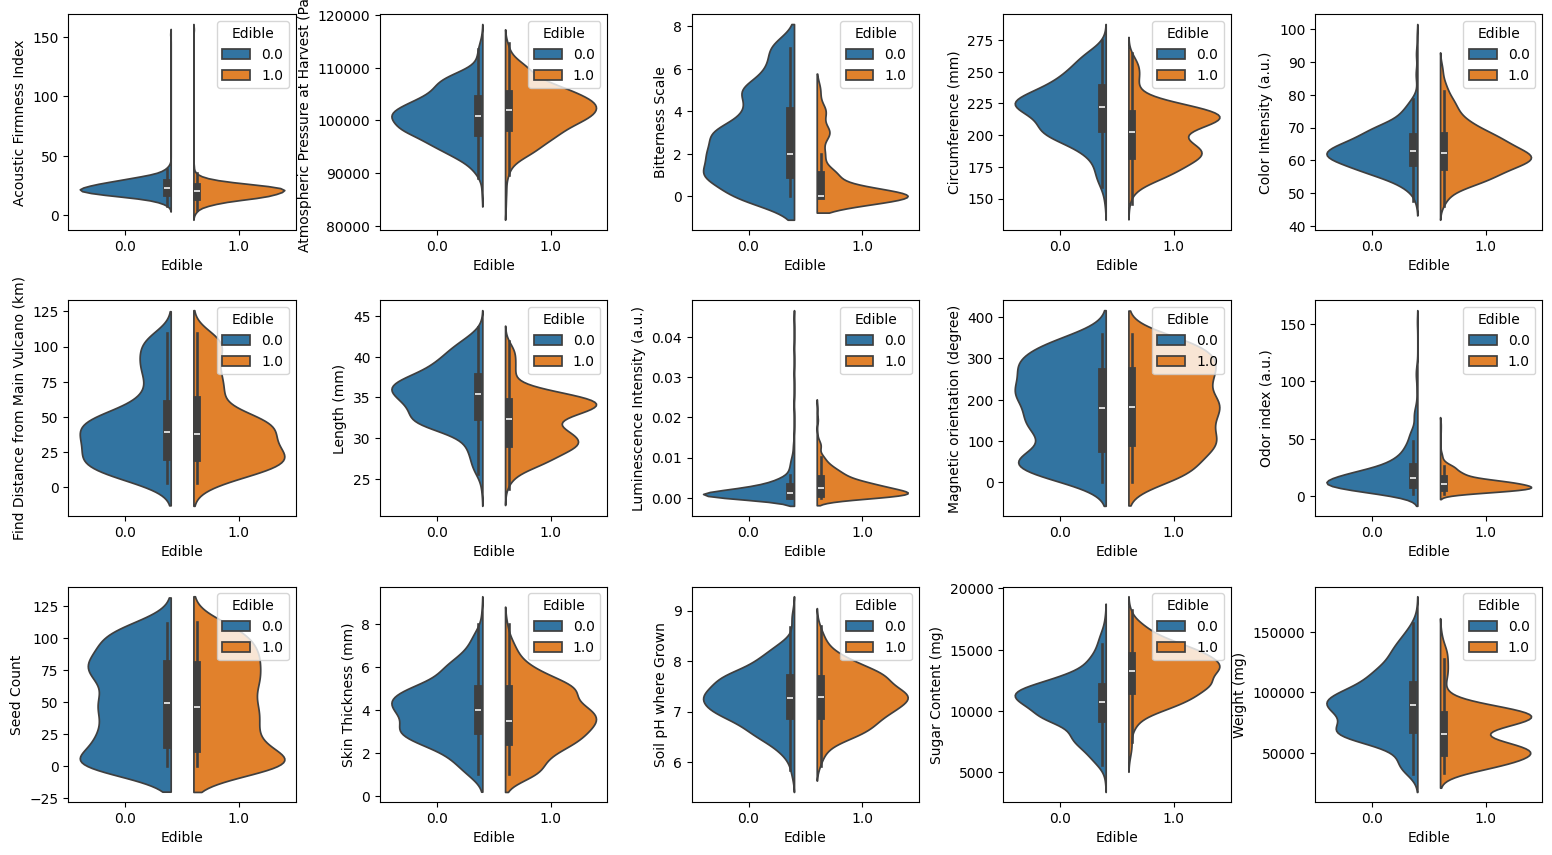

In [28]:
# violin plot
fig_violin, ax_violin = plt.subplots(nrows=3, ncols=5, figsize=(16, 9))
plt.tight_layout(pad=3.0)

i = 0
for row in range(3):
    for col in range(5):
        sns.violinplot(ax=ax_violin[row, col], data=train, x='Edible', y=train.columns[i], 
                       hue='Edible', split=True)
        i += 1
        
plt.show()

In [29]:
# Pair plot to get an overview of the data
#sns.pairplot(data=train, hue = 'Edible')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

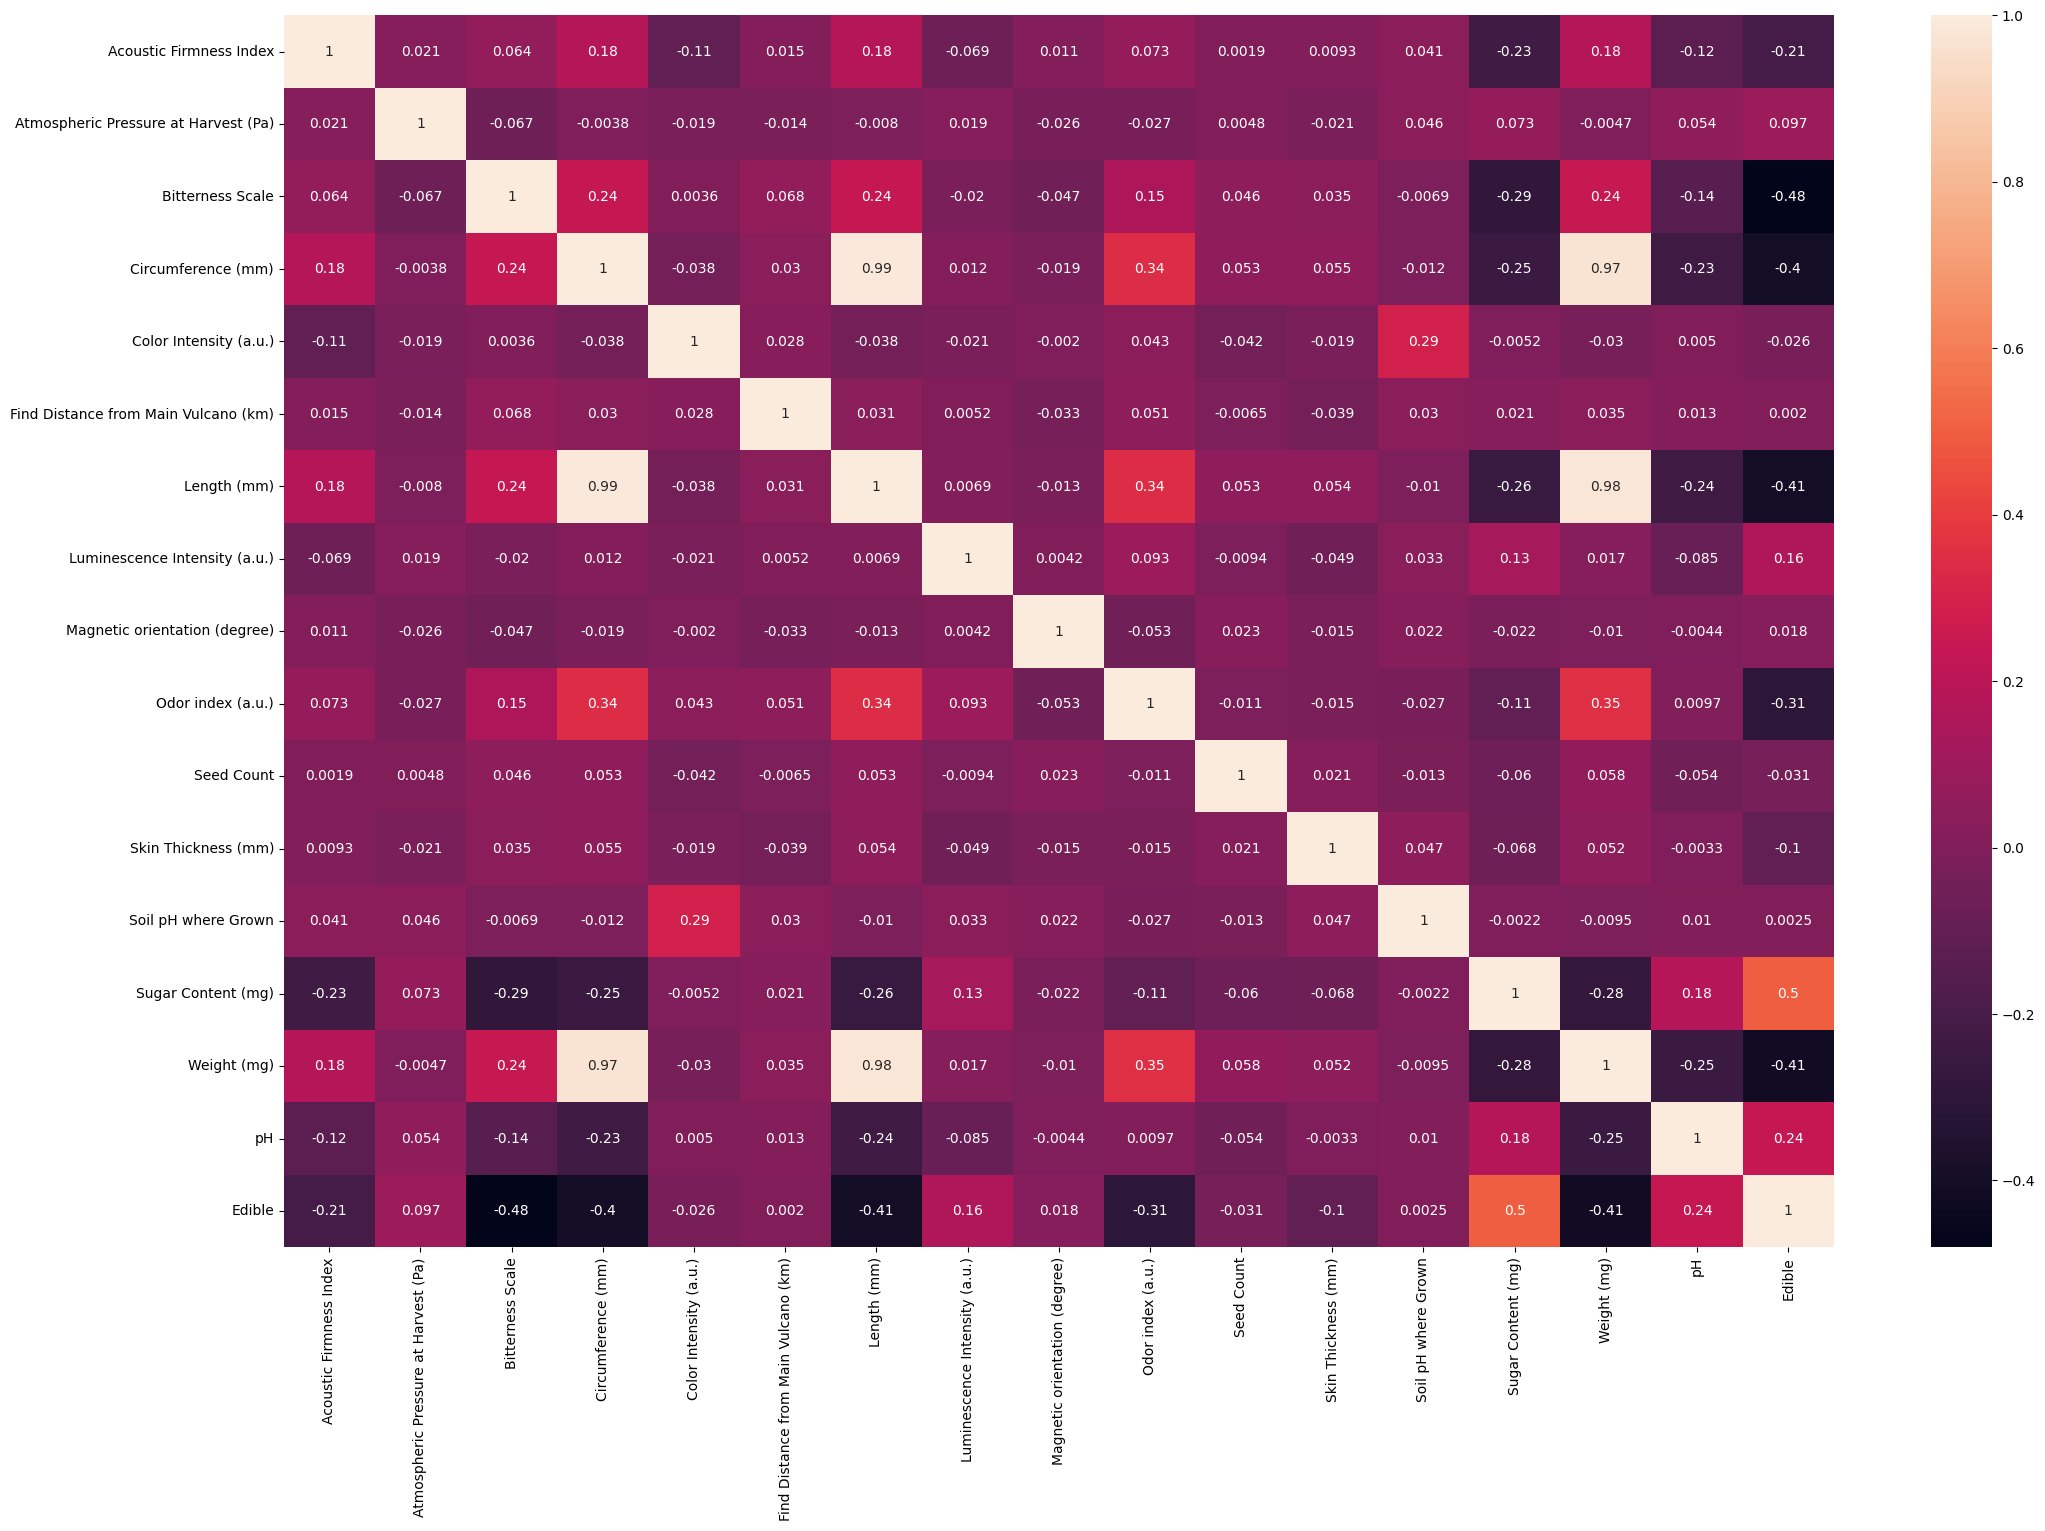

In [30]:
# Correlation matrix to see how the 
corr_matrix = train.corr()
fig_corr, ax_corr = plt.subplots(figsize=(25,16))
sns.heatmap(data=corr_matrix,annot=True, ax=ax_corr)
plt.show

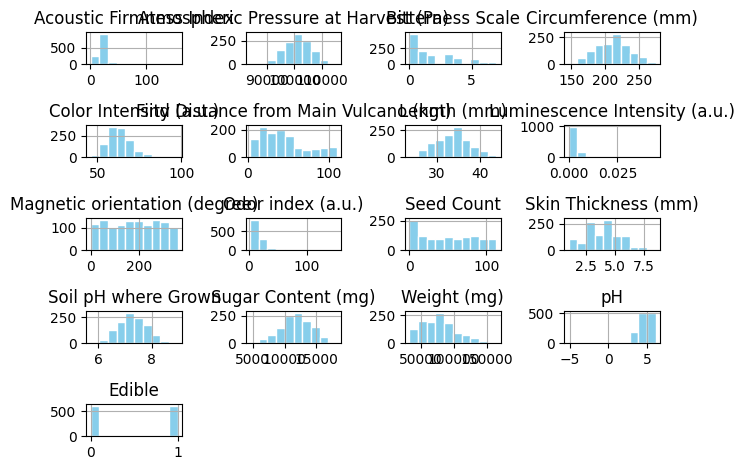

In [31]:
# Histogram 
train.hist(color="skyblue", edgecolor="white")
plt.tight_layout()
plt.show()

### Data cleaning

In [32]:

cleaned_data = train.copy() # make a copy of training data
col_names = list(cleaned_data.columns) #make a list with column names

# remove outliers using z score with |z|< 3
print(f'Shape of dataset before removing outliers{cleaned_data.shape}')
for col in col_names:
    z_scores = (cleaned_data[col] - np.mean(cleaned_data[col])) / np.std(cleaned_data[col])
    outliers = np.abs(z_scores) > 3
    cleaned_data = cleaned_data[~outliers]
    print(f"Number of outliers removed from {col}: {np.sum(outliers)}")

print(f'Shape of dataset after removing outliers {cleaned_data.shape}')

Shape of dataset before removing outliers(1211, 17)
Number of outliers removed from Acoustic Firmness Index: 2
Number of outliers removed from Atmospheric Pressure at Harvest (Pa): 3
Number of outliers removed from Bitterness Scale: 0
Number of outliers removed from Circumference (mm): 0
Number of outliers removed from Color Intensity (a.u.): 11
Number of outliers removed from Find Distance from Main Vulcano (km): 0
Number of outliers removed from Length (mm): 0
Number of outliers removed from Luminescence Intensity (a.u.): 17
Number of outliers removed from Magnetic orientation (degree): 0
Number of outliers removed from Odor index (a.u.): 24
Number of outliers removed from Seed Count: 0
Number of outliers removed from Skin Thickness (mm): 1
Number of outliers removed from Soil pH where Grown: 1
Number of outliers removed from Sugar Content (mg): 0
Number of outliers removed from Weight (mg): 1
Number of outliers removed from pH: 7
Number of outliers removed from Edible: 0
Shape of da

### Data exploration and visualization after cleaning

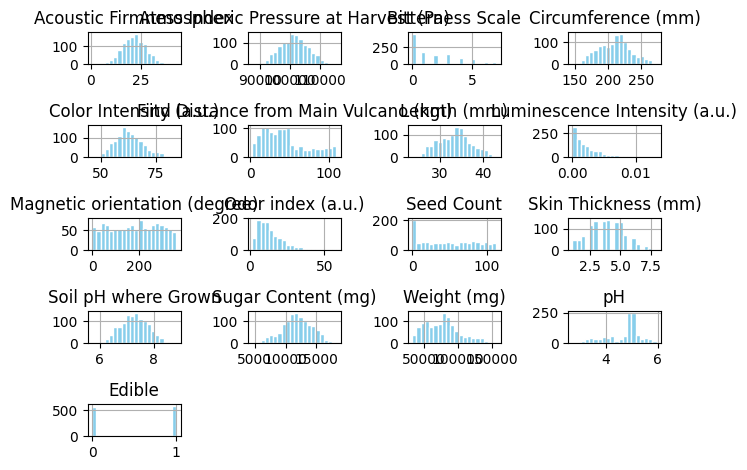

In [33]:
cleaned_data.hist(bins=20, color="skyblue", edgecolor="white")
plt.tight_layout()
plt.show()

In [34]:
#sns.pairplot(data=cleaned_data, hue='Edible')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

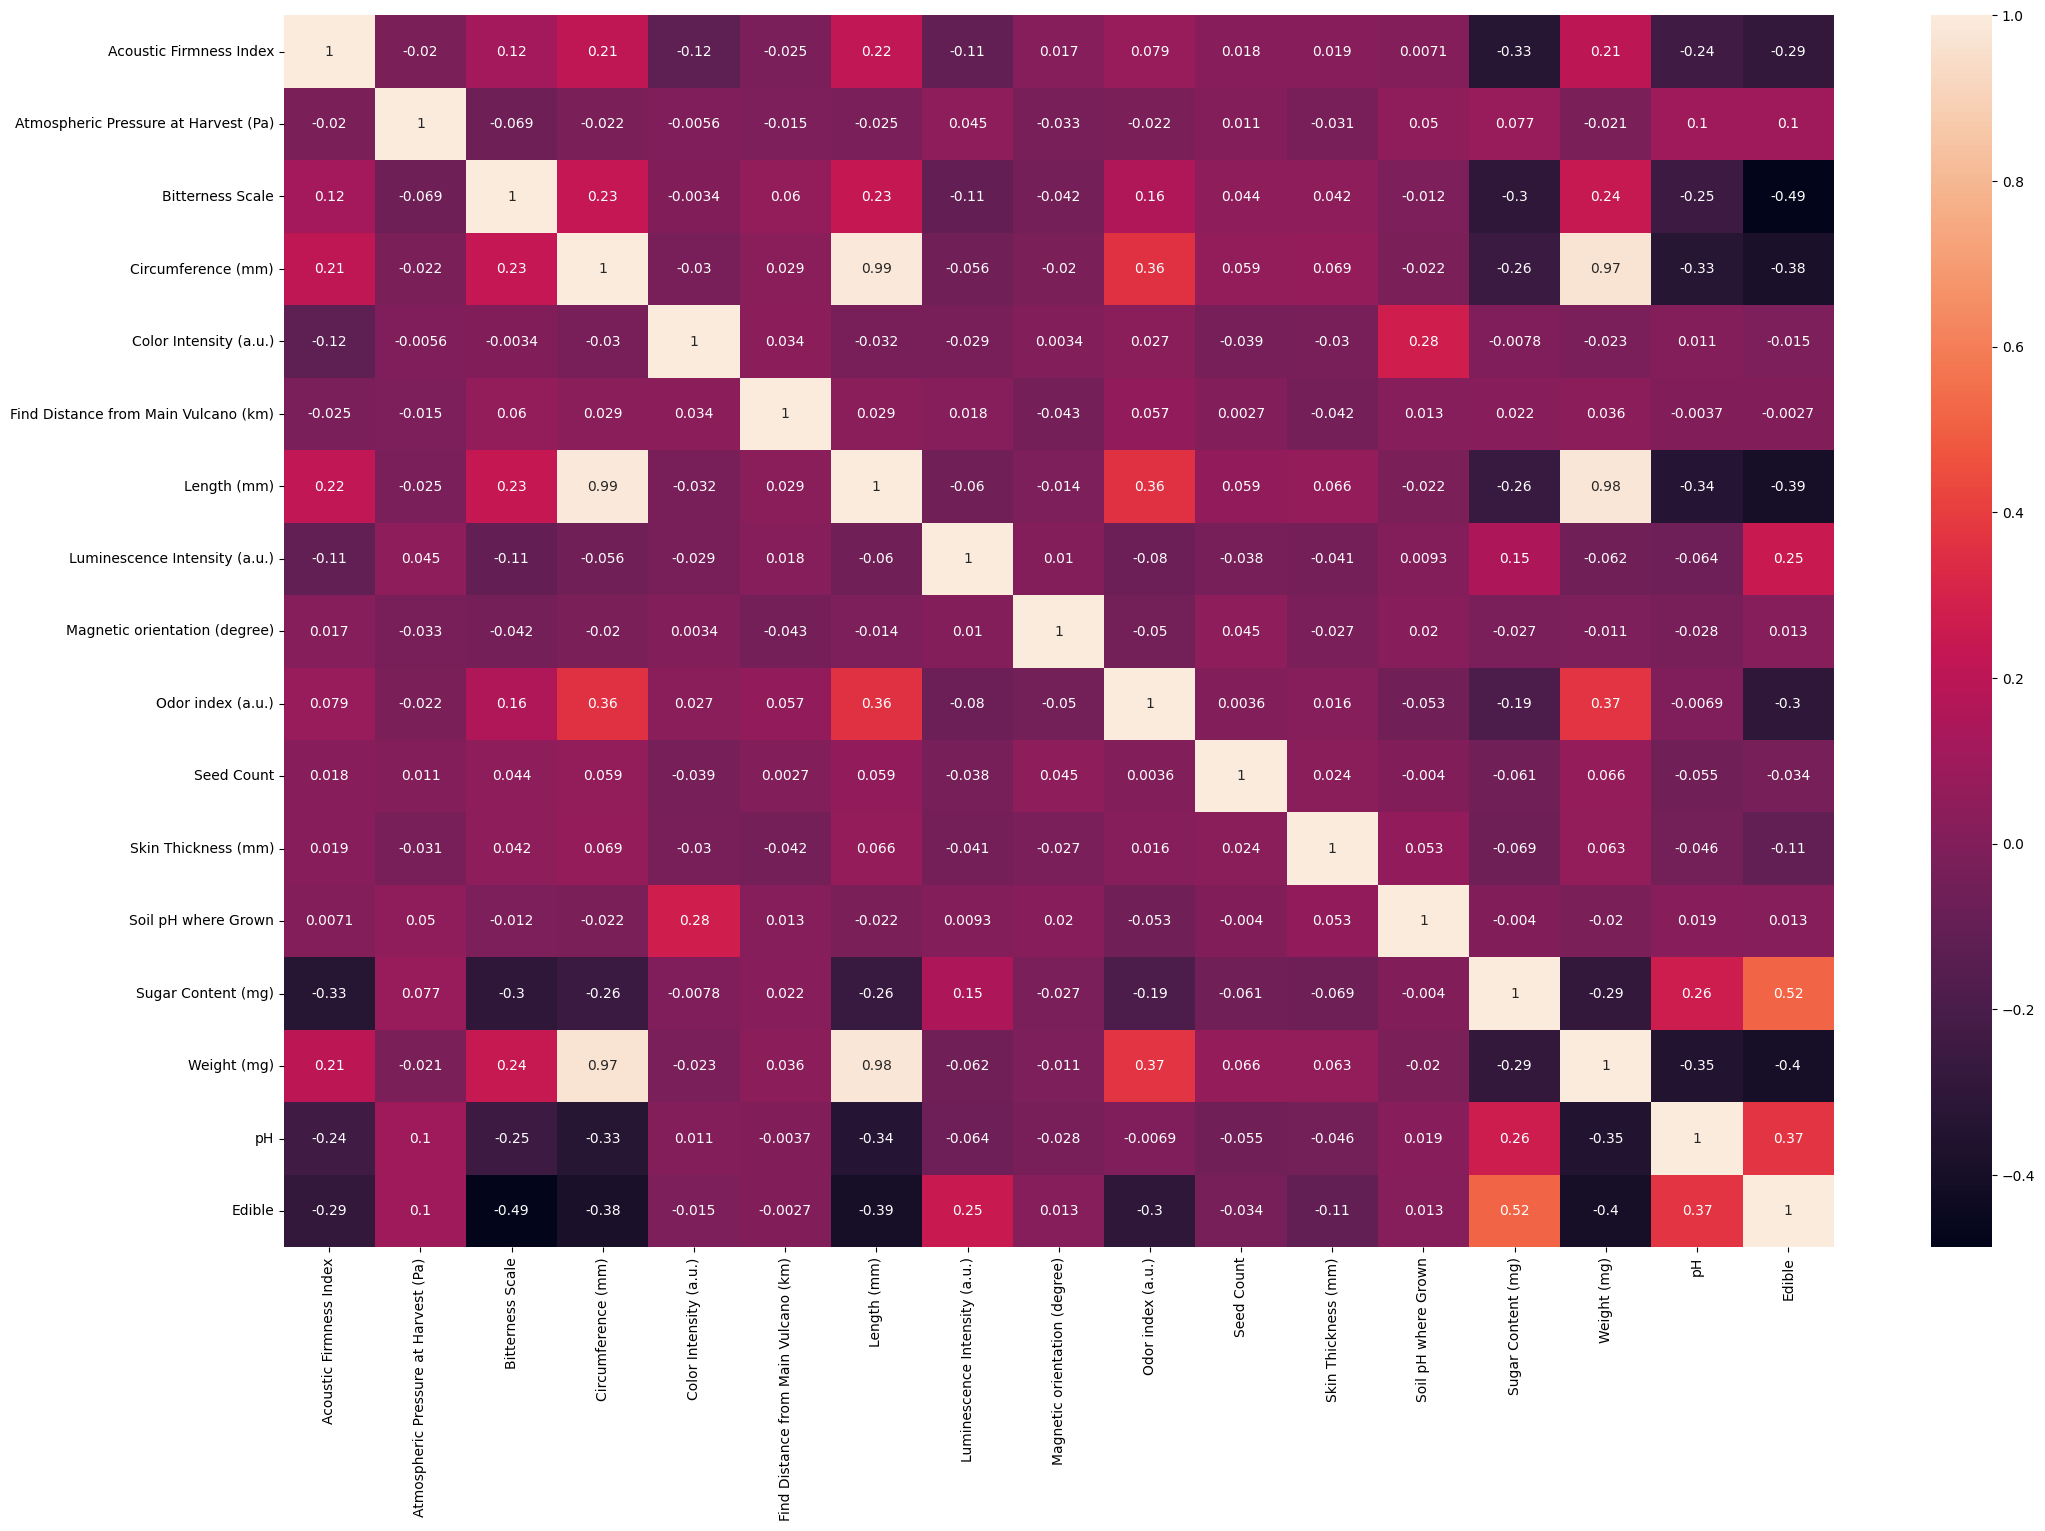

In [35]:
# Correlation matrix after cleaning the data 
corr_matrix = cleaned_data.corr()
fig_corr, ax_corr = plt.subplots(figsize=(25,16))
sns.heatmap(data=corr_matrix,annot=True, ax=ax_corr)
plt.show

### Data preprocessing and visualisation

In [36]:
X = cleaned_data.drop(['Edible'], axis = 1)
y = cleaned_data['Edible']


##### Train/Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print('X_train', X_train.shape)
print('X_test', X_test.shape)

print('y_train',y_train.shape)
print('y_test', y_test.shape)

X_train (686, 16)
X_test (458, 16)
y_train (686,)
y_test (458,)


#### Scaling

In [38]:
# Scaling the data with StandardScaler()

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print()

### Modelling

In [39]:
# Logistic Regression

# Initialize Logistic Regression classifier
log_reg = LogisticRegression()  # You can adjust parameters as needed

# Train the classifier
log_reg.fit(X_train_sc, y_train)
y_pred = log_reg.predict(X_test_sc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


In [40]:
# KNN 
knn = KNeighborsClassifier() # Default num_neighbors=5
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [41]:

# Initialize the RandomForestClassifier with the desired parameters
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=250,
                                random_state=21,
                                n_jobs=-1,
                                bootstrap=True
                               )

# Fit the classifier on the training data
forest.fit(X_train_sc, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test_sc)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.89


### Final evaluation

In [42]:

X_test_selected = X_train_sc
X_test_selected = pd.DataFrame(X_test_selected)
y_pred_test = forest.predict(X_test_selected)
y_pred_test = pd.DataFrame(y_pred_test, columns =['Edible'])
y_pred_test.index.name = 'index'
y_pred_test.to_csv('submission5.csv')

# Creating submission file
df_sub = pd.DataFrame({'index': range(len(y_pred)), 'target': y_pred})
df_sub.to_csv('sub.csv', index=False)

### Kaggle submission